In [26]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import aplpy
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.io import fits
from astropy.table import Table
from mpdaf.obj import Image, Cube
from mpdaf.sdetect import Source
from muse_analysis import setup_logging_for_notebook
from scipy import ndimage as nd
plt.style.use('seaborn-whitegrid')
setup_logging_for_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
s = Source.from_file('/home/simon/dev/specui/musecat_udf_10_c021_e015/udf_udf10_00080.fits')

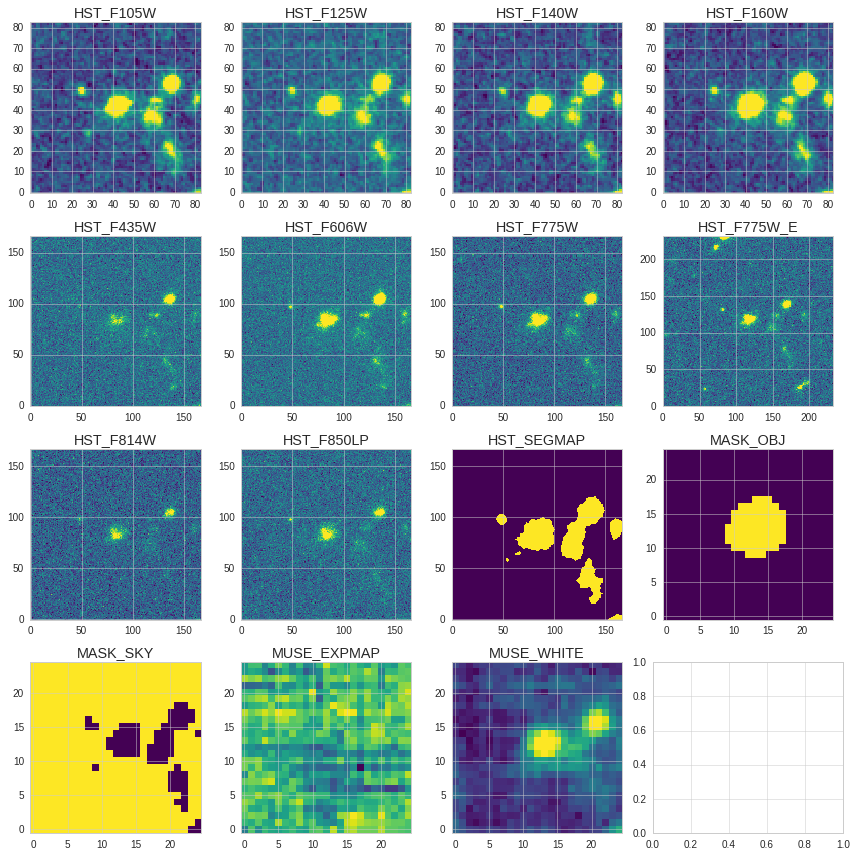

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12), tight_layout=True)
for i, (name, im) in enumerate(sorted(s.images.items())):
    ax = axes.flat[i]
    im.plot(ax=ax, cmap='viridis', zscale=not name.startswith('MASK'), 
            title=name, show_xlabel=False, show_ylabel=False)
    #ax.xaxis.set_visible(False)

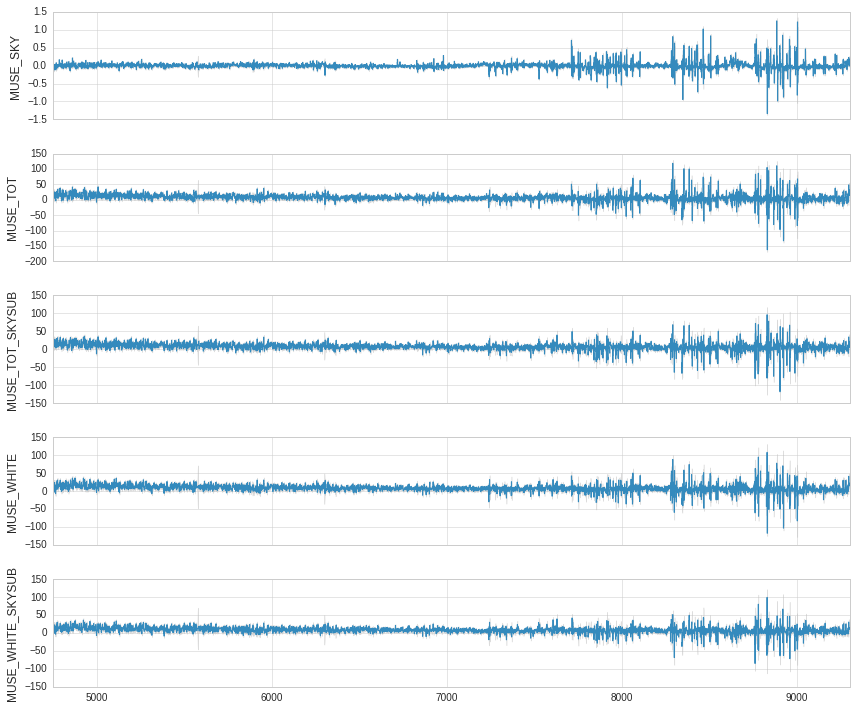

In [29]:
nspec = len(s.spectra)
fig, axes = plt.subplots(nspec, 1, figsize=(12, 2*nspec), tight_layout=True, sharex=True)
for i, (name, sp) in enumerate(sorted(s.spectra.items())):
    ax = axes.flat[i]
    sp.plot(ax=ax, noise=True)
    ax.set_xlabel('')
    ax.set_ylabel(name)
    ax.set_xlim(*sp.get_range())

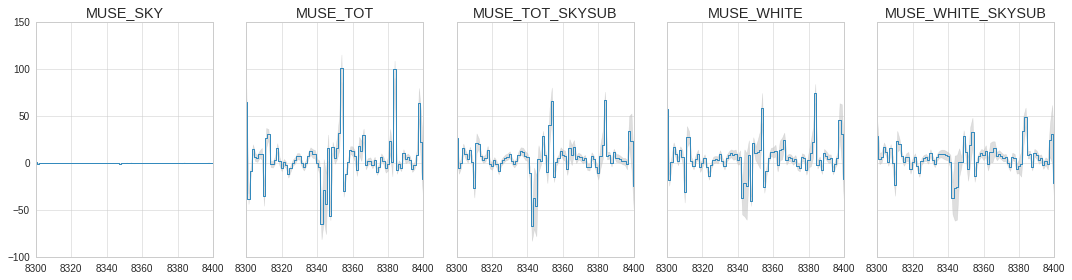

In [30]:
lmin, lmax = (8300, 8400)
nspec = len(s.spectra)
fig, axes = plt.subplots(1, nspec, figsize=(15, 4), tight_layout=True, sharey=True)
for i, (name, sp) in enumerate(sorted(s.spectra.items())):
    ax = axes.flat[i]
    sp.get_lambda(lmin, lmax).plot(ax=ax, noise=True, title=name)
    ax.set_xlabel('')
    ax.set_ylabel('')
    #ax.set_xlim(*sp.get_range())

In [42]:
c = s.cubes['MUSE_CUBE']
c.data *= s.images['MASK_OBJ'].data[np.newaxis, :, :]
c2 = c.copy()
c2.data /= c2.var

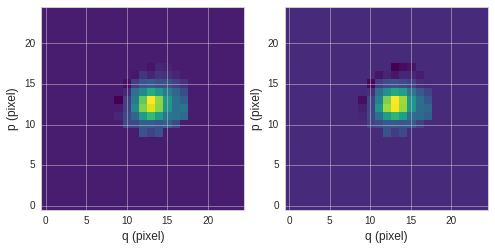

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
c.mean(axis=0).plot(ax=ax[0], cmap='viridis')
c2.mean(axis=0).plot(ax=ax[1], cmap='viridis')

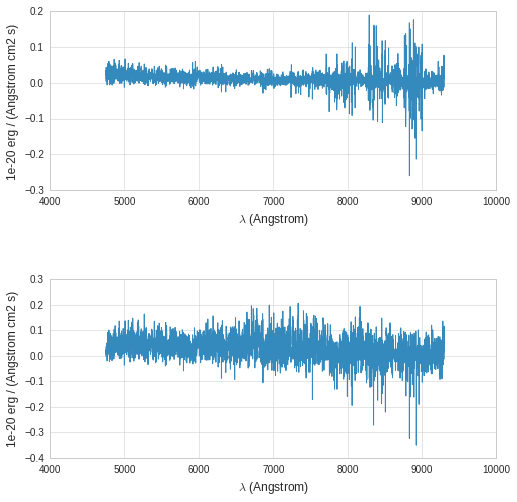

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
c.mean(axis=(1, 2)).plot(ax=ax[0])
c2.mean(axis=(1, 2)).plot(ax=ax[1])